# 1. Setup and Get Data

## 1.1 Install Dependencies and Setup

In [4]:
!pip install labelme tensorflow tensorflow-gpu opencv-python matplotlib albumentations

     ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
     - -------------------------------------- 0.0/1.4 MB 991.0 kB/s eta 0:00:02
     --- ------------------------------------ 0.1/1.4 MB 1.4 MB/s eta 0:00:01
     -------- ------------------------------- 0.3/1.4 MB 2.2 MB/s eta 0:00:01
     ------------ --------------------------- 0.4/1.4 MB 2.7 MB/s eta 0:00:01
     ---------------- ----------------------- 0.6/1.4 MB 2.9 MB/s eta 0:00:01
     ---------------------- ----------------- 0.8/1.4 MB 3.2 MB/s eta 0:00:01
     -------------------------- ------------- 1.0/1.4 MB 3.2 MB/s eta 0:00:01
     -------------------------------- ------- 1.1/1.4 MB 3.5 MB/s eta 0:00:01
     ------------------------------------ --- 1.3/1.4 MB 3.5 MB/s eta 0:00:01
     ---------------------------------------  1.4/1.4 MB 3.5 MB/s eta 0:00:01
     ---------------------------------------- 1.4/1.4 MB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.

  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [18 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\OUAZZE\AppData\Local\Temp\pip-install-g22j72lo\tensorflow-gpu_b6dca8565a9e4db3b00785392a0e13da\setup.py", line 37, in <module>
      raise Exception(TF_REMOVAL_WARNING)
  Exception:
  
  The "tensorflow-gpu" package has been removed!
  
  Please install "tensorflow" instead.
  
  Other than the name, the two packages have been identical
  since TensorFlow 2.1, or roughly since Sep 2019. For more
  information, see: pypi.org/project/tensorflow-gpu
  
  
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
ERROR: Could not build wheels for tensorflow-gpu, which is required to install pyproject.toml

   -------------------------- ------------- 3.6/5.5 MB 1.7 MB/s eta 0:00:02
   --------------------------- ------------ 3.7/5.5 MB 1.7 MB/s eta 0:00:02
   ---------------------------- ----------- 3.9/5.5 MB 1.7 MB/s eta 0:00:01
   ---------------------------- ----------- 4.0/5.5 MB 1.7 MB/s eta 0:00:01
   ------------------------------ --------- 4.2/5.5 MB 1.7 MB/s eta 0:00:01
   ------------------------------ --------- 4.2/5.5 MB 1.7 MB/s eta 0:00:01
   ------------------------------- -------- 4.3/5.5 MB 1.7 MB/s eta 0:00:01
   ------------------------------- -------- 4.4/5.5 MB 1.7 MB/s eta 0:00:01
   -------------------------------- ------- 4.6/5.5 MB 1.7 MB/s eta 0:00:01
   ---------------------------------- ----- 4.7/5.5 MB 1.7 MB/s eta 0:00:01
   ---------------------------------- ----- 4.8/5.5 MB 1.7 MB/s eta 0:00:01
   ----------------------------------- ---- 4.9/5.5 MB 1.8 MB/s eta 0:00:01
   ------------------------------------ --- 5.1/5.5 MB 1.8 MB/s eta 0:00:01
   ---------

## 1.2 Collect Images Using OpenCV

In [12]:
import os
import time
import uuid
import cv2

In [2]:
IMAGES_PATH = os.path.join('data','images')
number_images = 30

In [19]:
cap = cv2.VideoCapture(0)
for imgnum in range(number_images):
    print('Collecting image {}'.format(imgnum))
    ret, frame = cap.read()
    imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(0.5)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

## 1.3 Annotate Images with LabelMe

In [25]:
!labelme

2024-02-11 12:36:37,062 [INFO   ] __init__:get_config:67- Loading config file from: C:\Users\OUAZZE\.labelmerc


# 2. Review Dataset and Build Image Loading Function

## 2.1 Import TF and Deps

In [13]:
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt

## 2.2 Limit GPU Memory Growth

In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
tf.config.list_physical_devices('GPU')

[]

## 2.3 Load Image into TF Data Pipeline

In [31]:
images.as_numpy_iterator().next()

b'data\\images\\cd740caf-c8d0-11ee-8c08-e4b97a40b2d1.jpg'

In [24]:
def load_image(x): 
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [33]:
images = images.map(load_image)

In [34]:
images.as_numpy_iterator().next()

array([[[100, 155, 160],
        [101, 156, 161],
        [100, 155, 162],
        ...,
        [170, 237, 245],
        [169, 236, 244],
        [169, 236, 244]],

       [[100, 155, 160],
        [100, 155, 160],
        [100, 155, 162],
        ...,
        [170, 237, 245],
        [170, 237, 245],
        [169, 236, 244]],

       [[ 98, 155, 162],
        [ 98, 155, 162],
        [100, 155, 162],
        ...,
        [169, 236, 242],
        [170, 237, 245],
        [170, 237, 245]],

       ...,

       [[ 50,  90, 100],
        [ 50,  90, 100],
        [ 50,  88,  99],
        ...,
        [124, 188, 200],
        [125, 187, 200],
        [124, 188, 200]],

       [[ 50,  90, 100],
        [ 50,  90, 100],
        [ 50,  88,  99],
        ...,
        [124, 186, 199],
        [126, 185, 199],
        [124, 186, 197]],

       [[ 50,  90, 100],
        [ 49,  89,  99],
        [ 50,  88,  99],
        ...,
        [126, 185, 199],
        [125, 185, 196],
        [125, 185, 196]]

In [35]:
type(images)

tensorflow.python.data.ops.map_op._MapDataset

## 2.4 View Raw Images with Matplotlib

In [36]:
image_generator = images.batch(4).as_numpy_iterator()

In [46]:
plot_images = image_generator.next()

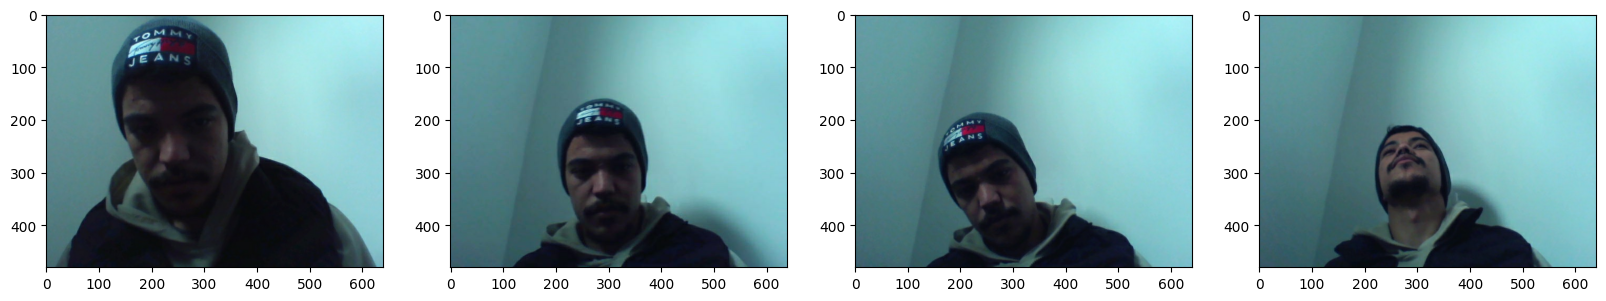

In [47]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image) 
plt.show()

# 3. Partition Unaugmented Data

## 3.1 MANUALLY SPLT DATA INTO TRAIN TEST AND VAL

In [48]:
90*.7 # 63 to train

62.99999999999999

In [49]:
90*.15 # 14 and 13 to test and val

13.5

## 3.2 Move the Matching Labels

In [50]:
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):
        
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data','labels', filename)
        if os.path.exists(existing_filepath): 
            new_filepath = os.path.join('data',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath)      

# 4. Apply Image Augmentation on Images and Labels using Albumentations

## 4.1 Setup Albumentations Transform Pipeline

In [14]:
import albumentations as alb

In [8]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450), 
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)], 
                       bbox_params=alb.BboxParams(format='albumentations', 
                                                  label_fields=['class_labels']))

## 4.2 Load a Test Image and Annotation with OpenCV and JSON

In [11]:
img = cv2.imread(os.path.join('data','train','images','cabbea9a-c8d0-11ee-b986-e4b97a40b2d1.jpg'))

In [13]:
with open(os.path.join('data','train','labels','cabbea9a-c8d0-11ee-b986-e4b97a40b2d1.json'),'r') as f:
    label = json.load(f)

In [14]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [15]:
coords

[137.6, 184.79999999999998, 396.0, 435.2]

In [16]:
coords = list(np.divide(coords, [640,480,640,480]))

In [17]:
coords

[0.215, 0.38499999999999995, 0.61875, 0.9066666666666666]

## 4.4 Apply Augmentations and View Results

In [18]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])

In [19]:
augmented['bboxes'][0][2:]

(0.7488888888888889, 0.9582222222222222)

In [20]:
augmented['bboxes']

[(0.17466666666666666,
  0.40177777777777773,
  0.7488888888888889,
  0.9582222222222222)]

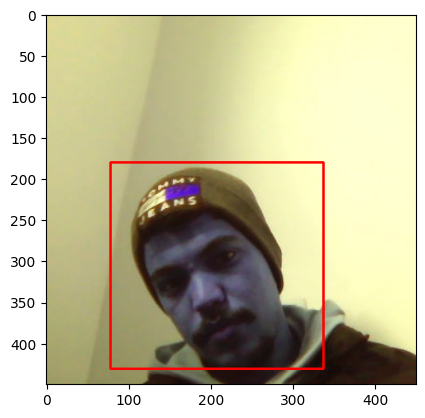

In [21]:
cv2.rectangle(augmented['image'], 
              tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)), 
                    (255,0,0), 2)

plt.imshow(augmented['image'])

# 5. Build and Run Augmentation Pipeline

## 5.1 Run Augmentation Pipeline

In [22]:
for partition in ['train','test','val']: 
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))

        try: 
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

image must be numpy array type
x_max is less than or equal to x_min for bbox [0.76, 0.6616666666666666, 0.175, 0.0016666666666666668, 'face'].
x_max is less than or equal to x_min for bbox [0.74375, 0.6983333333333334, 0.17875000000000002, 0.0016666666666666668, 'face'].
x_max is less than or equal to x_min for bbox [0.56375, 0.4383333333333333, 0.1775, 0.9133333333333333, 'face'].
x_max is less than or equal to x_min for bbox [0.96875, 0.7116666666666666, 0.3525, 0.008333333333333333, 'face'].
x_max is less than or equal to x_min for bbox [0.9, 0.6799999999999999, 0.3175, 0.003333333333333333, 'face'].
x_max is less than or equal to x_min for bbox [0.985, 0.7083333333333334, 0.4675000000000001, 0.008333333333333333, 'face'].
x_max is less than or equal to x_min for bbox [0.9974999999999999, 0.715, 0.5287499999999999, 0.003333333333333333, 'face'].
x_max is less than or equal to x_min for bbox [0.43499999999999994, 0.3783333333333333, 0.0025000000000000135, 0.9566666666666667, 'face'].

## 5.2 Load Augmented Images to Tensorflow Dataset

In [25]:
train_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [26]:
test_images = tf.data.Dataset.list_files('aug_data\\test\\images\\*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [27]:
val_images = tf.data.Dataset.list_files('aug_data\\val\\images\\*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [28]:
train_images.as_numpy_iterator().next()

array([[[0.40245098, 0.6068627 , 0.6142157 ],
        [0.39754903, 0.6132353 , 0.6004902 ],
        [0.3985294 , 0.61715686, 0.59362745],
        ...,
        [0.04981618, 0.1101103 , 0.21390931],
        [0.16629902, 0.30012256, 0.37610295],
        [0.5047181 , 0.70980394, 0.7293505 ]],

       [[0.4004902 , 0.62009805, 0.6204657 ],
        [0.4004902 , 0.62009805, 0.6093137 ],
        [0.4004902 , 0.6191176 , 0.60882354],
        ...,
        [0.06378677, 0.10900735, 0.22708334],
        [0.23602942, 0.38253677, 0.4668505 ],
        [0.5772059 , 0.8154412 , 0.83210784]],

       [[0.40931374, 0.62107843, 0.62107843],
        [0.4117647 , 0.62352943, 0.62352943],
        [0.41568628, 0.6156863 , 0.61960787],
        ...,
        [0.04240196, 0.11090686, 0.22953431],
        [0.4396446 , 0.62242645, 0.7023897 ],
        [0.6671569 , 0.95165443, 0.96047795]],

       ...,

       [[0.6       , 0.85490197, 0.87058824],
        [0.595098  , 0.8514706 , 0.85882354],
        [0.5838235 , 0

# 6. Prepare Labels

## 6.1 Build Label Loading Function

In [29]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

## 6.2 Load Labels to Tensorflow Dataset

In [30]:
train_labels = tf.data.Dataset.list_files('aug_data\\train\\labels\\*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [31]:
test_labels = tf.data.Dataset.list_files('aug_data\\test\\labels\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [32]:
val_labels = tf.data.Dataset.list_files('aug_data\\val\\labels\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [33]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.1124 , 0.04623, 0.6865 , 0.6025 ], dtype=float16))

# 7. Combine Label and Image Samples

## 7.1 Check Partition Lengths

In [34]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(3480, 3480, 720, 720, 720, 720)

## 7.2 Create Final Datasets (Images/Labels)

In [35]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [36]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [37]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [38]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1]], dtype=uint8),
 array([[0.2725, 0.1116, 0.733 , 0.7124],
        [0.2026, 0.1658, 0.766 , 0.9976],
        [0.    , 0.4692, 0.1676, 0.928 ],
        [0.5015, 0.2573, 0.8037, 0.577 ],
        [0.3987, 0.3582, 0.7295, 0.74  ],
        [0.4805, 0.3408, 0.932 , 0.874 ],
        [0.    , 0.    , 0.    , 0.    ],
        [0.5264, 0.3152, 0.9795, 0.893 ]], dtype=float16))

## 7.3 View Images and Annotations

In [50]:
data_samples = train.as_numpy_iterator()

In [51]:
res = data_samples.next()

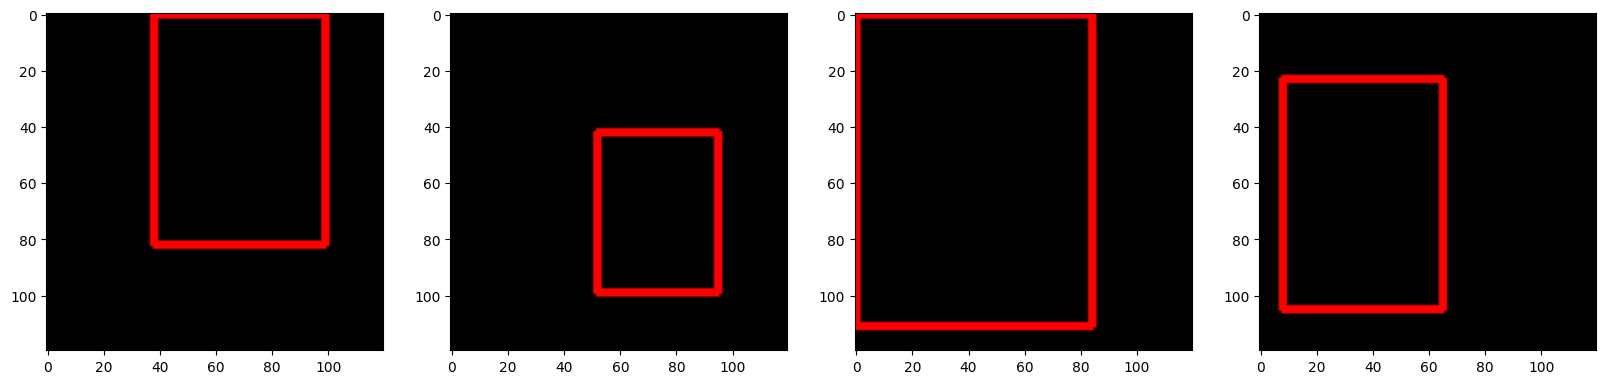

In [52]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]

        # Ensure the image array is of type np.uint8
    sample_image = sample_image.astype(np.uint8)

    # Make a copy of the image array
    sample_image = sample_image.copy()
    
    cv2.rectangle(sample_image, 
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                        (255,0,0), 2)

    ax[idx].imshow(sample_image)

# 8. Build Deep Learning using the Functional API

## 8.1 Import Layers and Base Network

In [15]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

## 8.2 Download VGG16

In [54]:
vgg = VGG16(include_top=False)



58889256/58889256 [==============================] - 54s 1us/step


In [55]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

## 8.3 Build instance of Network

In [56]:
def build_model(): 
    input_layer = Input(shape=(120,120,3))
    
    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model  
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

# 8.4 Test out Neural Network

In [57]:
facetracker = build_model()

In [58]:
facetracker.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 120, 120, 3)]        0         []                            
                                                                                                  
 vgg16 (Functional)          (None, None, None, 512)      1471468   ['input_2[0][0]']             
                                                          8                                       
                                                                                                  
 global_max_pooling2d (Glob  (None, 512)                  0         ['vgg16[0][0]']               
 alMaxPooling2D)                                                                                  
                                                                                              

In [59]:
X, y = train.as_numpy_iterator().next()

In [60]:
X.shape

(8, 120, 120, 3)

In [61]:
classes, coords = facetracker.predict(X)

1/1 [==============================] - 1s 819ms/step


In [62]:
classes, coords

(array([[0.38069075],
        [0.43476644],
        [0.40515745],
        [0.35920754],
        [0.31443807],
        [0.42155546],
        [0.36642212],
        [0.36543143]], dtype=float32),
 array([[0.42337972, 0.31992185, 0.3926253 , 0.5920645 ],
        [0.35324237, 0.31513107, 0.3102764 , 0.6660128 ],
        [0.3804799 , 0.34238952, 0.3322749 , 0.6402141 ],
        [0.38381004, 0.3239801 , 0.27766493, 0.6440606 ],
        [0.45681673, 0.36526722, 0.36997455, 0.56475055],
        [0.3884443 , 0.32338414, 0.35458335, 0.6613339 ],
        [0.42461553, 0.34268233, 0.34972   , 0.679826  ],
        [0.3996141 , 0.296515  , 0.32717547, 0.59336156]], dtype=float32))

# 9. Define Losses and Optimizers

## 9.1 Define Optimizer and LR

In [16]:
from tensorflow.keras.optimizers.schedules import ExponentialDecay

In [72]:
initial_learning_rate = 0.0001
decay_factor = (1.0 / 0.75) - 1.0
batches_per_epoch = len(train)  # Adjust based on your dataset

# Calculate decay steps based on batches per epoch
lr_decay_steps = batches_per_epoch

# Create a learning rate schedule
lr_schedule = ExponentialDecay(
    initial_learning_rate,
    decay_steps=lr_decay_steps,
    decay_rate=decay_factor,
    staircase=True  # You can adjust this parameter based on your needs
)

# Create an instance of the Adam optimizer using the learning rate schedule
opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

## 9.2 Create Localization Loss and Classification Loss

In [73]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

In [74]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

## 9.3 Test out Loss Metrics

In [81]:
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=4.4989376>

In [82]:
classloss(y[0], classes)

<tf.Tensor: shape=(), dtype=float32, numpy=0.9696831>

In [83]:
regressloss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=4.4989376>

# 10. Train Neural Network

## 10.1 Create Custom Model Class

In [84]:
class FaceTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [85]:
model = FaceTracker(facetracker)

In [86]:
model.compile(opt, classloss, regressloss)

## 10.2 Train

In [87]:
logdir='logs'

In [88]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [89]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
435/435 [==============================] - 1063s 2s/step - total_loss: 0.1950 - class_loss: 0.0295 - regress_loss: 0.1802 - val_total_loss: 0.1186 - val_class_loss: 1.5379e-05 - val_regress_loss: 0.1186
Epoch 2/10
435/435 [==============================] - 980s 2s/step - total_loss: 0.0617 - class_loss: 0.0102 - regress_loss: 0.0566 - val_total_loss: 0.1461 - val_class_loss: 1.1526e-05 - val_regress_loss: 0.1461
Epoch 3/10
435/435 [==============================] - 922s 2s/step - total_loss: 0.0343 - class_loss: 0.0048 - regress_loss: 0.0319 - val_total_loss: 0.1102 - val_class_loss: 1.8501e-05 - val_regress_loss: 0.1102
Epoch 4/10
435/435 [==============================] - 891s 2s/step - total_loss: 0.0243 - class_loss: 0.0029 - regress_loss: 0.0229 - val_total_loss: 0.0615 - val_class_loss: 1.5423e-06 - val_regress_loss: 0.0615
Epoch 5/10
435/435 [==============================] - 906s 2s/step - total_loss: 0.0210 - class_loss: 0.0024 - regress_loss: 0.0198 - val_total_los

## 10.3 Plot Performance

In [90]:
hist.history

{'total_loss': [0.033428438007831573,
  0.023190923035144806,
  0.017169374972581863,
  0.008453058078885078,
  0.012072356417775154,
  0.013005579821765423,
  0.013127380982041359,
  0.007602359168231487,
  0.008898711763322353,
  0.008674605749547482],
 'class_loss': [1.0073579687741585e-05,
  0.0003022480523213744,
  0.00016704725567251444,
  3.674229810712859e-05,
  2.6279691155650653e-05,
  2.6883970349445008e-05,
  1.4357818145072088e-05,
  2.3306267394218594e-05,
  6.794978162361076e-06,
  1.2800333934137598e-05],
 'regress_loss': [0.03342340141534805,
  0.0230397991836071,
  0.017085852101445198,
  0.008434686809778214,
  0.012059216387569904,
  0.012992138043045998,
  0.013120202347636223,
  0.007590705994516611,
  0.008895314298570156,
  0.008668205700814724],
 'val_total_loss': [0.11860379576683044,
  0.14605657756328583,
  0.11022872477769852,
  0.06145208701491356,
  0.1134784072637558,
  0.10912442207336426,
  0.08774437010288239,
  0.08079332113265991,
  0.14612755179405

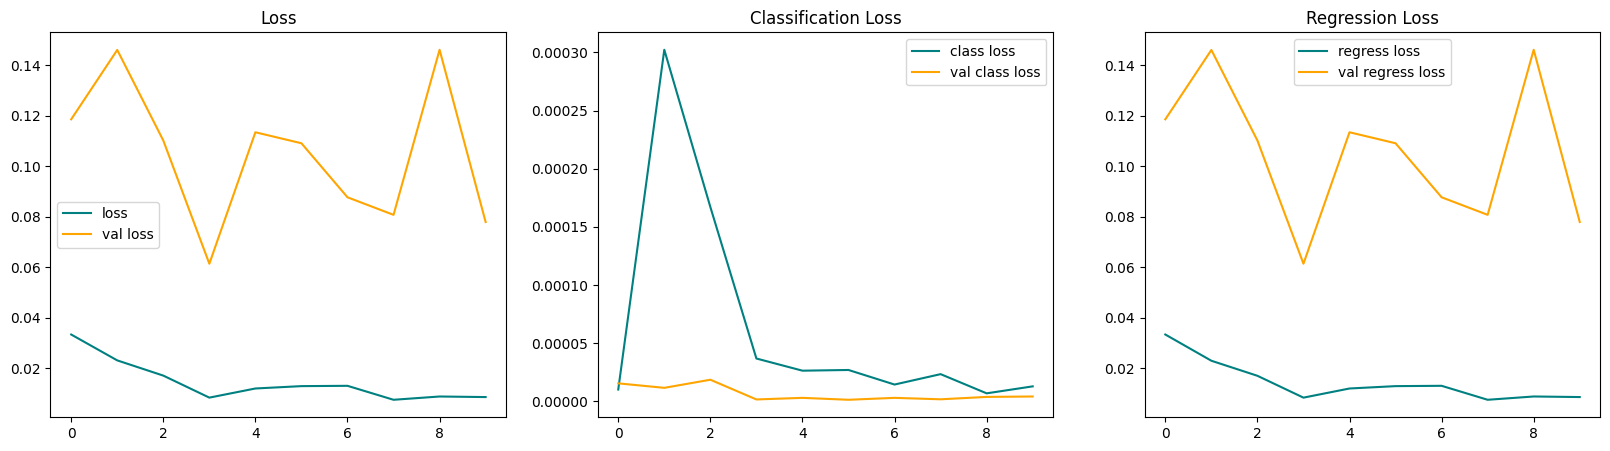

In [91]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

# 11. Make Predictions

## 11.1 Make Predictions on Test Set

In [92]:
test_data = test.as_numpy_iterator()

In [93]:
test_sample = test_data.next()

In [97]:
yhat = facetracker.predict(test_sample[0])

1/1 [==============================] - 0s 427ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


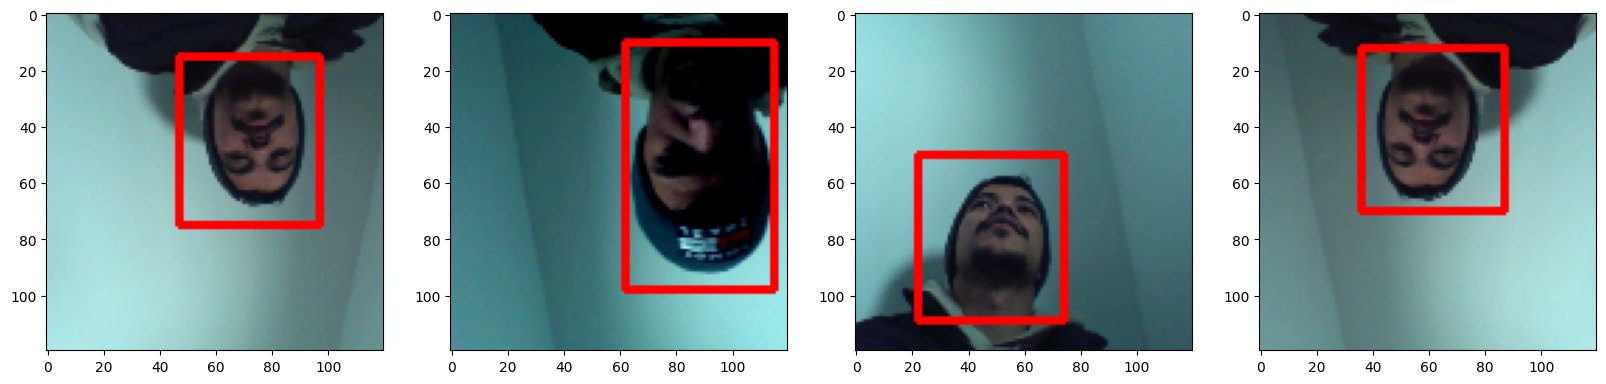

In [98]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))

for idx in range(4):
    sample_image = test_sample[0][idx].copy()  # Make a copy to avoid modifying the original array
    sample_coords = yhat[1][idx]

    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image,
                      tuple(np.multiply(sample_coords[:2], [120, 120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120, 120]).astype(int)),
                      (255, 0, 0), 2)

    ax[idx].imshow(sample_image)

## 11.2 Save the Model

In [17]:
from tensorflow.keras.models import load_model

In [ ]:
facetracker.save('facetracker.h5')

In [18]:
facetracker = load_model('facetracker.h5')

## 11.3 Real Time Detection

In [19]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    
    if yhat[0] > 0.5: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    cv2.imshow('EyeTrack', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 99ms/step
